In [104]:
import pandas as pd
import geopandas as gpd
import plotly.express as px
import plotly.offline as po
import matplotlib.pyplot as plt

In [105]:
caracteristiques = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/e22ba475-45a3-46ac-a0f7-9ca9ed1e283a', sep=';')
lieux = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/2ad65965-36a1-4452-9c08-61a6c874e3e6', sep=';')
vehicules = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/780cd335-5048-4bd6-a841-105b44eb2667', sep=';')
usagers = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/36b1b7b3-84b4-4901-9163-59ae8a9e3028', sep=';')
ids_accidents_mortels = usagers[usagers.grav == 2].Num_Acc.tolist()
caracteristiques['mortel'] = caracteristiques.Num_Acc.isin(ids_accidents_mortels)

In [106]:
accidents = caracteristiques.merge(lieux, on='Num_Acc')
accidents = accidents[accidents.dep.str[2:]==''] # on se restreint à la métropole

In [107]:
regions = gpd.read_file('regions_2015_metropole_region.geojson')
regions['region'] = pd.Series(data=['Grand Est', 'Nouvelle-Aquitaine', 'Auvergne-Rhône-Alpes', 'Normandie', 'Bourgogne-Franche-Comté', 'Bretagne', 'Centre-Val de Loire', 'Corse', 'Île-de-France', 'Occitanie', 'Hauts-de-France', 'Pays de la Loire', "Provence-Alpes-Côte d'Azur"])
regions = regions[['region', 'geometry']].set_index('region')
regions

,geometry
region,
Grand Est,"POLYGON ((7.57822 48.11831, 7.57795 48.11754, ..."
Nouvelle-Aquitaine,"MULTIPOLYGON (((1.44898 45.01620, 1.44835 45.0..."
Auvergne-Rhône-Alpes,"MULTIPOLYGON (((6.26109 45.12371, 6.26090 45.1..."
Normandie,"POLYGON ((1.71469 49.40618, 1.71476 49.40604, ..."
Bourgogne-Franche-Comté,"POLYGON ((6.94079 47.43019, 6.94066 47.42789, ..."
Bretagne,"MULTIPOLYGON (((-1.94715 48.53577, -1.94730 48..."
Centre-Val de Loire,"POLYGON ((2.16889 46.42084, 2.16776 46.42082, ..."
Corse,"POLYGON ((9.39521 41.85758, 9.39504 41.85742, ..."
Île-de-France,"POLYGON ((1.60962 49.07458, 1.61075 49.07488, ..."


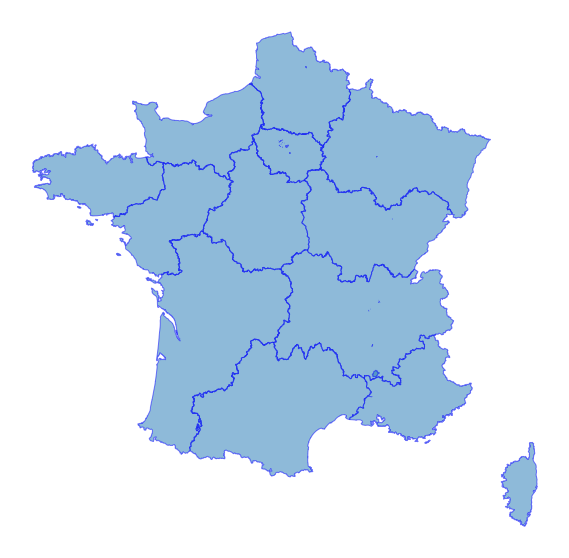

In [108]:
fig, ax = plt.subplots(figsize=(10, 10))
regions.plot(ax = ax, alpha=0.5, edgecolor='blue')
ax.set_axis_off()

In [109]:
departements = pd.read_csv('departements-france.csv').set_index('code_departement')
departements.head()

,nom_departement,code_region,nom_region
code_departement,,,
01,Ain,84,Auvergne-Rhône-Alpes
02,Aisne,32,Hauts-de-France
03,Allier,84,Auvergne-Rhône-Alpes
04,Alpes-de-Haute-Provence,93,Provence-Alpes-Côte d'Azur
05,Hautes-Alpes,93,Provence-Alpes-Côte d'Azur


In [110]:
accidents['region'] = accidents.dep.apply(lambda code_dep: departements.loc[code_dep, 'nom_region'] if len(code_dep)==2 else departements.loc['0'+code_dep, 'nom_region'])

In [111]:
accidents = accidents[['region', 'mortel']]
regions['nb_accidents'] = accidents.groupby(by='region').count()['mortel']
regions['nb_accidents_mortels'] = accidents.groupby(by='region').sum()['mortel']
regions['prop_accidents_mortels'] = regions.nb_accidents_mortels / regions.nb_accidents
regions

,geometry,nb_accidents,nb_accidents_mortels,prop_accidents_mortels
region,,,,
Grand Est,"POLYGON ((7.57822 48.11831, 7.57795 48.11754, ...",3551,256,0.072092
Nouvelle-Aquitaine,"MULTIPOLYGON (((1.44898 45.01620, 1.44835 45.0...",4828,346,0.071665
Auvergne-Rhône-Alpes,"MULTIPOLYGON (((6.26109 45.12371, 6.26090 45.1...",6381,418,0.065507
Normandie,"POLYGON ((1.71469 49.40618, 1.71476 49.40604, ...",2305,163,0.070716
Bourgogne-Franche-Comté,"POLYGON ((6.94079 47.43019, 6.94066 47.42789, ...",1650,189,0.114545
Bretagne,"MULTIPOLYGON (((-1.94715 48.53577, -1.94730 48...",2495,158,0.063327
Centre-Val de Loire,"POLYGON ((2.16889 46.42084, 2.16776 46.42082, ...",2126,155,0.072907
Corse,"POLYGON ((9.39521 41.85758, 9.39504 41.85742, ...",615,27,0.043902
Île-de-France,"POLYGON ((1.60962 49.07458, 1.61075 49.07488, ...",17829,258,0.014471


C:\Users\Erwan\AppData\Local\Temp/ipykernel_21372/1740095292.py:2: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




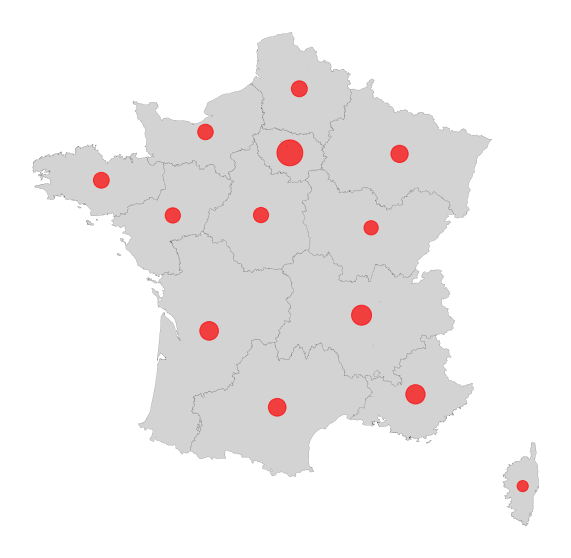

In [112]:
regions_centroides = regions.copy()
regions_centroides['geometry'] = regions.geometry.centroid

fig, ax = plt.subplots(figsize=(10,10))
regions.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=.1)
regions_centroides.plot(ax=ax, color='red', markersize=5*regions_centroides.nb_accidents**.5, alpha=.7, legend=True)
ax.axis('off')

plt.show()

In [113]:
fig = px.scatter_mapbox(regions_centroides,
                        lat=regions_centroides.geometry.y, 
                        lon=regions_centroides.geometry.x, 
                        size='nb_accidents',
                        color='prop_accidents_mortels',
                        hover_name=regions_centroides.index.to_series(),
                        color_continuous_scale='Reds',
                        title='Titre')
fig.show()
# Ne fonctionne pas

In [114]:
import folium, numpy

center_lat = regions_centroides.geometry.y.mean()
center_long = regions_centroides.geometry.x.mean()

france_map = folium.Map(location=[center_lat, center_long], zoom_start=6)

df = regions_centroides
max_mortality = df.prop_accidents_mortels.max()
for region in df.index.to_series().unique():
    line = df.loc[region,:]
    folium.CircleMarker(location=[line.geometry.y, line.geometry.x],
                        radius=numpy.sqrt(float(line.nb_accidents/25)), # pour que l'aire soit proportionelle au nb d'accidents
                        tooltip=region,
                        popup=region,
                        color='#{}0000'.format(hex(int(255*line.prop_accidents_mortels/max_mortality))[2:]),
                        fill_color='#{}0000'.format(hex(int(255*line.prop_accidents_mortels/max_mortality))[2:]),
                        fill_opacity=1,
                        alpha=1
                        ).add_to(france_map)


france_map
# Il faudrait voir s'il y a moyen de ne garder que le fond pour la france
